<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/ML/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀분석 개념
ref : https://movefast.tistory.com/302
* 예제 코드 사용 데이터셋: 보스턴 주택 가격  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# boston 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1-1. 선형 회귀
ref : https://steadiness-193.tistory.com/270?category=964168

### 개념
* 데이터를 가장 잘 설명해내는 직선을 찾아내는 것.

* 데이터가 분포되어 있는 공간에서 데이터를 가장 잘 표현하는 선을 긋는 것.

* 가장 적합간 기울기(가중치, 계수)와 y절편(편향)을 찾아내는 것.

<img src="https://blog.kakaocdn.net/dn/bzUpsr/btrwsImIFBK/MMed37olMaXCd3Kq44R790/img.png">

### 다중 선형 회귀
보통 데이터셋은 2개 이상의 feature를 갖고 있기 때문에 단순 선형회귀에 대한 개념은 생략한다.
* <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJ2rte%2FbtqIH5K33oO%2FwWhfciZDSQJPSYVSoth0O1%2Fimg.png"></img>
* ŷ : 예측값
* x : 독립변수, 특성으로 부르지만 여기선 특성(feature)으로 통일한다.
* w : 기울기 또는 계수(coefficient) 또는 가중치. 여기선 가중치(weight)로 통일한다.
* b : y절편 또는 편향. 여기선 편향(offset)으로 통일한다.

위 식에서 특성은 총 n+1개이므로 가중치도 n+1개가 필요하다.
주어진 여러 개의 샘플들의 n+1개의 특성들과 라벨값(y) 사이의 관계를 잘 설명해내는 적합한 가중치들 (w0, w1, ..., wn)과 편향(b)를 찾아내야 한다.

회귀모델은 실제 라벨 값 y와 예측 값 ŷ의 차이인 잔차를 제곱한 평균인 MSE를 통해 가중치와 편향을 찾는다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwCvOz%2FbtqIwEn8dmC%2FUUIjZBCxnRY2y2O8qeWGNK%2Fimg.png"></img><br>
잔차의 이해를 돕기 위해 단순선형회귀그래프를 이용함
<br>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbmrTSs%2FbtqIwYG336g%2FMEbqLRKXv20sciZglC4KU0%2Fimg.png"></img><br>
위 상황에서 MSE의 값은 0.4

## 1-2. 다항 회귀
ref : https://inuplace.tistory.com/515

### 개념

* 항이 여러 개인 가설 함수로 결과를 예측하는 회귀 분석 방법이다.

* 항은 제곱근이나 2차항, 3차항 등 다양하게 있으며 함수의 형태가 비선형이라는 특징이 있다.

* 다항 회귀를 활용하는 한 가지 방법은 서로 다른 두 Feature 를 하나의 feature로 만들어서 해당 feature를 입력으로 2차 이상의 함수를 예측하는 것이다.

    - 예를 들어, 부동산에서 집값 예측 시 땅의 가로/세로 길이가 주어졌을 때 면적(=가로*세로)으로 만들어서 면적에 따른 결과를 예측하기

    - 새 feature 에 대해 그래프를 그렸을 때 데이터를 잘 표현하는 비선형 함수를 찾아야 한다.

    - 새 feature 에 대해서도 feature scaling 을 적절히 해주어야 한다. 특히, 실수의 곱이나 범위가 큰 두 feature의 곱은 너무 0에 가깝거나 너무 큰 수가 되버릴 수 있다.

* 보통 2차함수는 중간에 하강하므로 3차(cubic) 함수부터 아니면 단조증가하는 제곱근이나 로그 함수를 많이 쓴다.

<img width="500" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FI5kYW%2FbtqWjq4CRxM%2FNnMnMm35qhqESp6HGQ7Of0%2Fimg.png"></img>

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

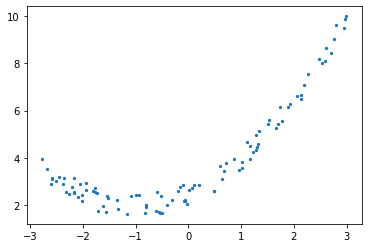

In [4]:
n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

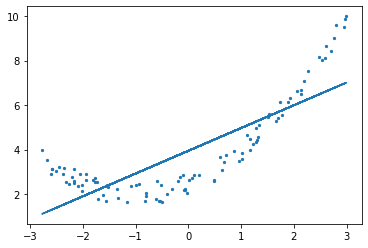

In [5]:
#선형 회귀 그래프
lr=LinearRegression()
lr.fit(x, y)
y_preds=lr.predict(x)
plt.plot(x, y_preds)
plt.scatter(x, y, s=5)

* 선형회귀는 데이터 분포에 실제 target값들과 가장 잔차가 적은 직선 하나를 그린다. 

In [6]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[0.98440436 0.49800289]]


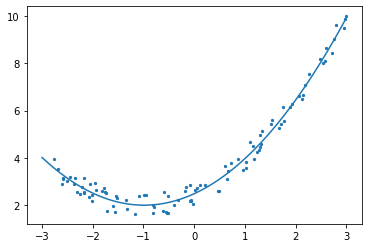

In [7]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100) #X값(-3~3 까지)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)

* 다항회귀는 다수의 항을 이용하여 데이터 분포와 유사한 비선형곡선을 그릴 수 있다.

## 1-3. 규제 선형 모델
ref : https://steadiness-193.tistory.com/262

In [8]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

좋은 회귀 모델을 만들기 위해선 선형 모델의 비용함수(RSS)를 최소화 하면서도 회귀 계수 값이 커지지 않는 균형점을 찾아야한다.

 
그 균형점을 찾기 위한 방법으로 회귀 계수의 크기를 제어하면서 과적합을 개선하기 위해 비용(Cost)함수 목표를 다음과 같이 변경할 수 있다.

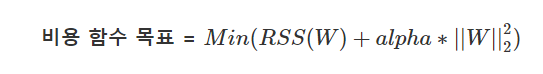

위 수식에서 alpha는 학습 데이터 적합 정도와 회귀 계수의 크기를 제어하는 튜닝 파라미터입니다.

 
위 수식의 최소값을 만족하는 W 벡터를 찾기 위해 alpha 값이 어떤 역할을 하는지 알아보겠습니다.

 
먼저 alpha 값이 0 또는 0에 수렴하는 매우 작은 값이라면 위 수식은 다음과 같이 변합니다.

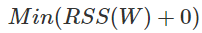

반면 alpha 값이 무한대에 가까운 매우 큰 값이라면 RSS(W)에 비해 아래의 값이 비정상적으로 커지게 됩니다.

따라서 alpha 값을 크게 가져간다면 회귀 계수 W를 작게 가져가는 것으로 과적합을 개선할 수 있으며 alpha 값을 작게 가져가는 경우 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하여 데이터 적합을 개선할 수 있게 됩니다.

 
 
 
이처럼 alhpa 값을 0에서부터 지속적으로 증가시켜 회귀 계수 값의 크기를 감소시키는 것이 가능하며 비용 함수에 alhpa 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방법을 규제(Regularization) 이라고 합니다.

 


### L1 규제 (Lasso)

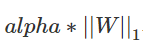

L1 규제는 아래의 식과 같이 W의 절댓값에 대해 패널티를 부여하는 규제 방법으로 <font color='red'><b>영향력이 크지 않은 회귀 계수 값을 0으로 변환</b></font>하며 L1 규제를 적용한 회귀를 <b>라쏘(Lasso) 회귀</b>라 부릅니다.

<img src="https://blog.kakaocdn.net/dn/cWBQwc/btrwnr1fzgg/cV2OdV1f3Z2KLVIiaLKRMk/img.png">

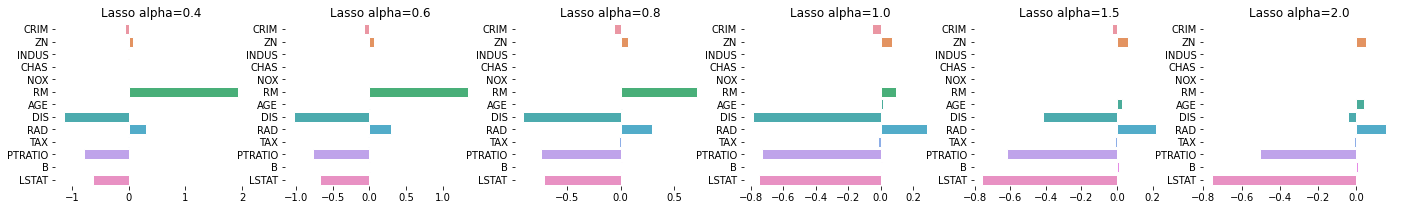

In [10]:
#규제 정도(alpha값)에 따른 피쳐 중요도 시각화 
from sklearn.model_selection import train_test_split
p, axes = plt.subplots(1,6, figsize=(24,3))
alpha_list=[0.4,0.6,0.8,1.0,1.5,2.0]
y = bostonDF["PRICE"]
X = bostonDF.drop(["PRICE"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

for i,a in enumerate(alpha_list):
    model=Lasso(alpha=a)
    model.fit(X_train,y_train)
    axes[i].set_title(model.__class__.__name__+ ' alpha='+str(a))
    sns.set_style("white")
    sns.despine(left=True, bottom=True)
    sns.barplot(y=X.columns, x=model.coef_, ax=axes[i])

* L1 규제 정도(alpha값)에 따른 피쳐 중요도(회귀계수) 변화

### L2 규제 (Ridge)

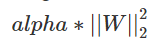

이어서 L2 규제는 아래의 식과 같이 <font color='red'><b>W의 제곱에 대해 패널티를 부여하는 방법</b></font>을 사용하며 L2 규제를 적용한 회귀를 <b>릿지(RIdge) 회귀</b>라 부릅니다.


<img src="https://blog.kakaocdn.net/dn/4jZBq/btrwnquBx1C/vHv81lF4ufP6x2w63fdOJ1/img.png">

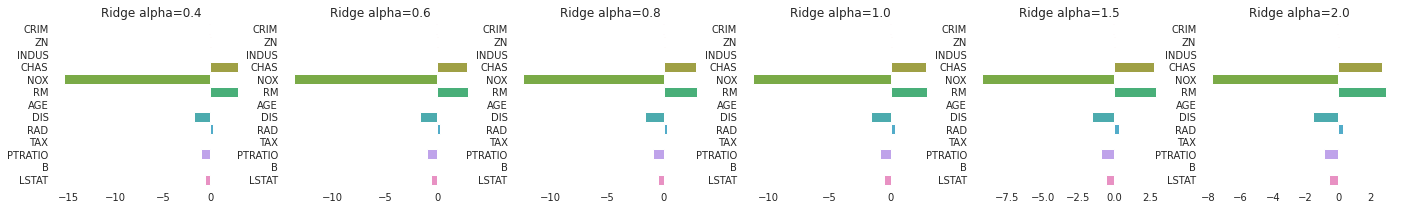

In [11]:
#규제 정도(alpha값)에 따른 피쳐 중요도 시각화 
p, axes = plt.subplots(1,6, figsize=(24,3))
alpha_list=[0.4,0.6,0.8,1.0,1.5,2.0]
y = bostonDF["PRICE"]
X = bostonDF.drop(["PRICE"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)

for i,a in enumerate(alpha_list):
    model=Ridge(alpha=a)
    model.fit(X_train,y_train)
    axes[i].set_title(model.__class__.__name__+ ' alpha='+str(a))
    sns.set_style("white")
    sns.despine(left=True, bottom=True)
    sns.barplot(y=X.columns, x=model.coef_, ax=axes[i])

* L2 규제 정도(alpha값)에 따른 피쳐 중요도(회귀계수) 변화

<img src="https://blog.kakaocdn.net/dn/6ISEU/btrwnPgxr0g/kRWBKCbUVaQZcBdrNtkxHK/img.png">

## 1-4. 회귀트리
ref : https://velog.io/@sset2323/05-08.-%ED%9A%8C%EA%B7%80-%ED%8A%B8%EB%A6%AC


* 회귀 트리는 회귀 함수(선형회귀의 경우)를 기반으로 하지 않고, 결정 트리와 같이 트리기반으로 한다. 
* 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것이다. 회귀 트리의 경우 분류 트리와 크게 다르지 않다. 
* 다만 리프 노드에서 예측 결정값을 만드는 과정에 차이가 있다. 
* 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 <b>평균값</b>을 구해 회귀 예측값을 계산한다.

 

### 원리

<img width="500" src="https://blog.kakaocdn.net/dn/no6Ol/btrwqMD1Iqj/7Mqcv7r5kDpWuQhSxkrZK0/img.jpg"></img>

* Feature가 하나인 데이터 세트와 Target을 2차원 그래프로 시각화한다고 가정한다.

<img src="https://blog.kakaocdn.net/dn/27sed/btrwp0vPKYZ/YO5L2ktaTyIxtu3MqzlQtk/img.jpg"></img>

* 이 데이터 세트의 Feature를 결정 트리 기반으로 분할하면, X값의 균일도를 반영한 지니 계수에 따라 그림의 왼쪽과 같이 분할할 수 있다.
* 루트 노드를 Split 0 기준으로 분할하고 분할된 규칙 노드를 다시 Split 1,2로 분할할 수 있다. 그리고 Split 2는 3로 분할할 수 있다.

<img src="https://blog.kakaocdn.net/dn/xZdD3/btrwwryR437/RYT4E11TAa5wrkCtgZh62K/img.jpg"></img>

* 트리 분할이 완료됐다면 리프 노드에 소속된 데이터 값의 편균값을 구해서 최종적으로 리프 노드에 결정값으로 할당한다.

<img width="400" src=https://blog.kakaocdn.net/dn/cbazlU/btrwsI2bJJJ/SW1NrLzucvqbdQ13W4O240/img.png></img>

* RandomForest, XGB, LGBM 과 같은 모델들이 회귀트리 기반의 모델들이다.

회귀 트리 Regressor 클래스는 회귀계수와 편향(절편)을 활용하는 함수를 기반으로 하지 않기 때문에 coef_(회귀계수)는 알 수 없지만, classifier와 동일하게 featureimfortances를 이용해 feature 별 중요도를 알 수 있다.

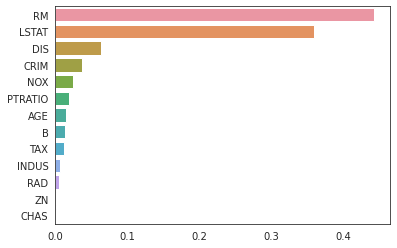

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(bostonDF.drop('PRICE',axis=1), bostonDF['PRICE'])

feature_series = pd.Series(data=rf_reg.feature_importances_, index=bostonDF.drop('PRICE',axis=1).columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

## 1-5. 다중공선성

* 다중공선성(多重共線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수(Feature)들 간에 강한 상관관계가 나타나는 문제이다.
* 서로 상관성이 높은 Feature들은 회귀 모델 학습에 안 좋은 영향을 미친다.
* 독립변수(Feature) 간 상관관계는 heatmap을 통해 확인 할 수 있다.

### 상관관계 분석

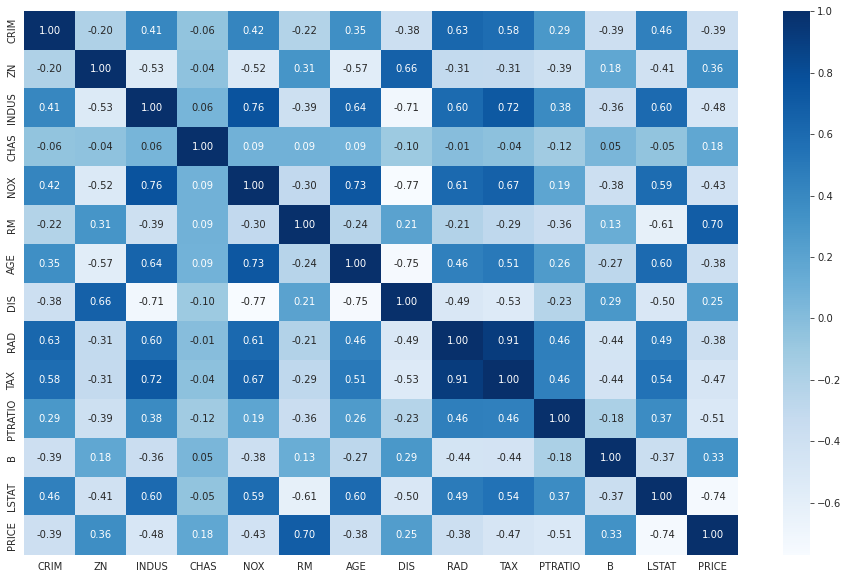

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(bostonDF.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

* 보통 설명변수들간의 상관계수 값(0.9 이상)을 기준으로 다중공선성을 점검한다.

## 1-6. 회귀 평가 지표
ref : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

* 회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이를 기반으로 한다.
* 회귀 평가지표 MAE, MSE, RMSE, MSLE, RMSLE는 값이 작을수록 회귀 성능이 좋음
* 값이 작을수록 예측값과 실제값의 차이가 없다는 뜻
* R² 는 값이 클수록 성능이 좋습니다. <회귀모델의 설명력>

###MAE (Mean Absolue Error)

*실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMycEv%2Fbtqz6WWhHet%2FyljD5EmxjqE7S9Pdx57yVK%2Fimg.png">

###MSE (Mean Squared Error)

* 실제 값과 예측 값의 차이를 제곱해 평균한 것

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Foithd%2Fbtqz5yoyNoL%2FIuFkyjAuwPY935b4KmYjy0%2Fimg.png">

###RMSE (Root Mean Squared Error)

* MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓰는 것입니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbawPPb%2Fbtqz6IcS3PV%2FFh7BJdhJHecO4YRtweLOj1%2Fimg.png">

###MSLE (Mean Squared Log Error)

* MSE에 로그를 적용해준 지표입니다. log(y)가 아니라 log(y+1)입니다. y=0일 때, log(y)는 마이너스 무한대이므로 이를 보정해주기 위해 +1을 한 것입니다. 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbndFxw%2Fbtqz5yWqJhg%2Fbwbeu20KrRAYbBdw2xBfVK%2Fimg.png">

###RMSLE (Root Mean Squared Log Error)

* RMSE에 로그를 적용해준 지표입니다.

<img width="400" src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fez03Z9%2Fbtqz6g8ZKVe%2FfbRBuBOIcxoUr7KOGnHl81%2Fimg.jpg">

###R² (R Sqaure)

* R² 는 분산 기반으로 예측 성능을 평가합니다. 1에 가까울수록 예측 정확도가 높습니다.

* R² = 예측값 Variance / 실제값 Variance

### 예시코드

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

origin = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7])
pred = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7])

MAE =  mean_absolute_error(origin, pred)
print("MAE : ",MAE)
MSE = mean_squared_error(origin, pred)
print("MSE : ",MSE)
RMSE = np.sqrt(MSE)
print("RMSE : ",RMSE)
MSLE = mean_squared_log_error(origin, pred)
print("MSLE : ",MSLE)
RMSLE = np.sqrt(mean_squared_log_error(origin, pred))
print("RMSLE : ",RMSLE)
R2 = r2_score(origin, pred)
print("R2 : ",R2)

MAE :  0.45454545454545453
MSE :  0.45454545454545453
RMSE :  0.674199862463242
MSLE :  0.029272467607503513
RMSLE :  0.1710919858073531
R2 :  0.868421052631579


# 2. 회귀분석 모델 설명 및 코드

## 2-1. Linear Regression <선형회귀>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear#sklearn.linear_model.LinearRegression

### API
<img src="https://blog.kakaocdn.net/dn/Ee7JG/btrwkvJNF80/JEkRlREuwVuSbRmwCwpc40/img.png"></img>

### 파라미터 설명
* fit_intercept : bool, default=True
    - 회귀 모델의 절편(상수값)을 계산할지 여부. False로 설정하면 계산에 절편이 사용되지 않음(즉, 데이터가 중앙에 위치할 것으로 예상됨).

* normalize : bool, default=False
    - 정규화 여부, 1.2 버전부터 삭제

* copy_X : bool, default=True
    - 입력 데이터의 복사 여부. False 시, 데이터의 평균을 원점(0)에 맞춤

* n_jobs : int, default=None
    - 데이터 분석에 사용될 코어의 개수 (-1 입력 시 사용 가능한 모든 코어 사용)

* positive : bool, default=False
    - True 입력 시 회귀계수가 양수(+)가 됨

### 예시코드(활용 예시)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [25]:
# 평가 지표 확인
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R2 Score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 18.871, RMSE : 4.344
R2 Score : 0.767


In [19]:
#절편값 구하기 (lr.intercept_)
print('절편 값:',lr.intercept_)
#회귀계수값 구하기 (lr.ceof_)
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff

절편 값: 28.981270388095602


CRIM       -0.1
ZN          0.0
INDUS       0.1
CHAS        0.3
NOX       -14.3
RM          4.8
AGE        -0.0
DIS        -1.3
RAD         0.3
TAX        -0.0
PTRATIO    -1.0
B           0.0
LSTAT      -0.5
dtype: float64

## 2-2. PolynomialFeatures <다항회귀>
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures

### API
<img src="https://blog.kakaocdn.net/dn/brRspG/btrwnqVs3cY/jT1wNLT1rVkiYUpGEwn590/img.png"></img>

### 파라미터 설명
* degree : int or tuple (min_degree, max_degree), default=2
    - 다항식 차수 결정

* interaction_only : bool, default=False
    - True 시, 다른 Feature와 상호작용하는 Feature만 생성, 즉 제곱 혹은 세제곱 등 같은 제곱항 제외
포함: x[0], x[1], x[0] * x[1], etc.<br>
제외: x[0] ** 2, x[0] ** 2 * x[1], etc.

* include_bias : bool, default=True
    - 절편 포함여부
* order : {‘C’, ‘F’}, default=’C’
    - 출력 배열 순서 (그냥 default 씁시다)

### 예시코드(활용 예시)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # 기본 다항식형태를 만들고
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
X_train_poly
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다.

array([[2.21880000e-01, 2.00000000e+01, 6.96000000e+00, ...,
        1.52701193e+05, 2.57126660e+03, 4.32964000e+01],
       [5.36000000e-02, 2.10000000e+01, 5.64000000e+00, ...,
        1.57529610e+05, 2.09563200e+03, 2.78784000e+01],
       [6.88800000e-02, 0.00000000e+00, 2.46000000e+00, ...,
        1.57529610e+05, 3.75070500e+03, 8.93025000e+01],
       ...,
       [3.51140000e-01, 0.00000000e+00, 7.38000000e+00, ...,
        1.57529610e+05, 3.05613000e+03, 5.92900000e+01],
       [9.18702000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.57529610e+05, 9.36684000e+03, 5.56960000e+02],
       [4.55587000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.25812090e+05, 2.52546400e+03, 5.06944000e+01]])

* PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)
* degree 옵션으로 차수를 조절한다.
* include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
* 이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [22]:
np.array(X_train.iloc[0,:]), X_train_poly[0]

(array([2.2188e-01, 2.0000e+01, 6.9600e+00, 1.0000e+00, 4.6400e-01,
        7.6910e+00, 5.1800e+01, 4.3665e+00, 3.0000e+00, 2.2300e+02,
        1.8600e+01, 3.9077e+02, 6.5800e+00]),
 array([2.21880000e-01, 2.00000000e+01, 6.96000000e+00, 1.00000000e+00,
        4.64000000e-01, 7.69100000e+00, 5.18000000e+01, 4.36650000e+00,
        3.00000000e+00, 2.23000000e+02, 1.86000000e+01, 3.90770000e+02,
        6.58000000e+00, 4.92307344e-02, 4.43760000e+00, 1.54428480e+00,
        2.21880000e-01, 1.02952320e-01, 1.70647908e+00, 1.14933840e+01,
        9.68839020e-01, 6.65640000e-01, 4.94792400e+01, 4.12696800e+00,
        8.67040476e+01, 1.45997040e+00, 4.00000000e+02, 1.39200000e+02,
        2.00000000e+01, 9.28000000e+00, 1.53820000e+02, 1.03600000e+03,
        8.73300000e+01, 6.00000000e+01, 4.46000000e+03, 3.72000000e+02,
        7.81540000e+03, 1.31600000e+02, 4.84416000e+01, 6.96000000e+00,
        3.22944000e+00, 5.35293600e+01, 3.60528000e+02, 3.03908400e+01,
        2.08800000e+01, 1.

* fit_transform을 통해 위와 같이 각 피쳐를 곱한 항을 추가하여 반환한다. (a²,ab,ac,ac ..., b²,bc,bd, ...)

In [23]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
lr = LinearRegression()
lr.fit(X_train_poly, y_train) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.
y_preds = lr.predict(X_test_poly)


In [24]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 18.871, RMSE : 4.344
R스퀘어 (결정계수) : 0.767



* 선형회귀 모델을 만들고, 다항화한 x의 데이터와 기존의 y값을 모델에 fit시켜준다.
* 이를 통해 모델이 완성되었고 이를 활용할 수도 있다.

## 2-3. Ridge regression <릿지회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/dhrxxJ/btrwrImPw5i/Ftb6hEgSxS0Na9pLizWfaK/img.png"></img>

### 파라미터 설명
####alpha : {float, ndarray of shape (n_targets,)}, default=1.0
* Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

####fit_intercept : bool, default=True
* Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e. X and y are expected to be centered).

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####max_iter : int, default=None
* Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000.

####tol : float, default=1e-3
* Precision of the solution.

#### solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
* Solver to use in the computational routines:

* ‘auto’ chooses the solver automatically based on the type of data.

* ‘svd’ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’.

* ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.

* ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).

* ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

* ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

* ‘lbfgs’ uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.

* All last six solvers support both dense and sparse data. However, only ‘sag’, ‘sparse_cg’, and ‘lbfgs’ support sparse input when fit_intercept is True.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive. Only ‘lbfgs’ solver is supported in this case.

####random_state : int, RandomState instance, default=None
* Used when solver == ‘sag’ or ‘saga’ to shuffle the data. See Glossary for details.


### 예시코드(활용 예시)

In [30]:
from sklearn.linear_model import Ridge, RidgeCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = Ridge(alpha=1.0, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [31]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 29.158, RMSE : 5.400
R스퀘어 (결정계수) : 0.639


## 2-4. Lasso regression <라쏘회귀 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/bTRYDW/btrwonqpM2O/8DJlYEpwe1jEcfRNkOc2c1/img.png"></img>


### 파라미터 설명
#### alpha : float, default=1.0
* Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

#### fit_intercept : bool, default=True
* Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

* precomputebool or array-like of shape (n_features, n_features), default=False
Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####max_iter : int, default=1000
* The maximum number of iterations.

####tol : float, default=1e-4
* The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

####warm_start : bool, default=False
* When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive.

####random_state : int, RandomState instance, default=None
* The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls. See Glossary.

####selection : {‘cyclic’, ‘random’}, default=’cyclic’
* If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### 예시코드(활용 예시)

In [33]:
from sklearn.linear_model import Lasso, LassoCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = Lasso(alpha=1.0, fit_intercept=True,
              normalize='deprecated', precompute=False, copy_X=True,
              max_iter=1000, tol=0.0001, warm_start=False, positive=False,
              random_state=None, selection='cyclic')
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [34]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 29.122, RMSE : 5.397
R스퀘어 (결정계수) : 0.640


## 2-5. Elastic-net <엘라스틱 넷 - 규제>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html?highlight=elastic#sklearn.linear_model.ElasticNet

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/cGSxOt/btrwmqOqsEP/l5uuo8qCJ5mpARl24KOpx0/img.png"></img>

### 파라미터 설명
####alpha : float, default=1.0
* Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

####l1_ratio : float, default=0.5
* The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.

####fit_intercept : bool, default=True
* Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.

####normalize : bool, default=False
* This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

####precompute : bool or array-like of shape (n_features, n_features), default=False
* Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

####max_iter : int, default=1000
* The maximum number of iterations.

####copy_X : bool, default=True
* If True, X will be copied; else, it may be overwritten.

####tol : float, default=1e-4
* The tolerance for the optimization: if the updates are smaller than tol, the optimization code checks the dual gap for optimality and continues until it is smaller than tol.

####warm_start : bool, default=False
* When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary.

####positive : bool, default=False
* When set to True, forces the coefficients to be positive.

####random_state : int, RandomState instance, default=None
* The seed of the pseudo random number generator that selects a random feature to update. Used when selection == ‘random’. Pass an int for reproducible output across multiple function calls. See Glossary.

####selection : {‘cyclic’, ‘random’}, default=’cyclic’
* f set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### 예시코드(활용 예시)

In [35]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = ElasticNet(alpha=1.0, l1_ratio=0.5,
                   fit_intercept=True, normalize='deprecated',
                   precompute=False, max_iter=1000, copy_X=True,
                   tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [36]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 28.840, RMSE : 5.370
R스퀘어 (결정계수) : 0.643


## 2-6. Random Forest regression <랜덤포레스트 회귀 - 회귀트리>
ref : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor

### API 스샷 -> 예시 코드
<img src="https://blog.kakaocdn.net/dn/VXFl7/btrwptKJXN7/qL2xJqZRlyLuIXEQlKIMK0/img.png"></img>

### 파라미터 설명

### 예시코드(활용 예시)

In [37]:
from sklearn.ensemble import RandomForestRegressor
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE',axis=1)
#데이터셋 나누기(train, test)
X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=123)
#모델 사용
model = RandomForestRegressor(n_estimators=100, criterion='squared_error',
                              max_depth=None, min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                              min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None,
                              random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [38]:
mse= mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('R스퀘어 (결정계수) : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 15.243, RMSE : 3.904
R스퀘어 (결정계수) : 0.811


## 2-7. Extreme Gradient Boosting regression <XGB - 회귀트리>
ref: https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

### API 스샷 -> 예시 코드

### 파라미터 설명

### 예시코드(활용 예시)

## 2-8. Light Gradient Boosting regression <LGBM - 회귀트리>
ref: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

### API 스샷 -> 예시 코드

<img src="https://blog.kakaocdn.net/dn/cu1uhp/btrwsIBaDcb/vVIlKvtoA9skj5Qs1eK3Hk/img.png"></img>

### 파라미터 설명

### 예시코드(활용 예시)

## 2-9. Catboost regression <Catboost - 회귀트리>
ref : https://catboost.ai/en/docs/concepts/python-reference_catboostregressor

### API 스샷 -> 예시 코드

### 파라미터 설명

### 예시코드(활용 예시)

# 3. pycaret을 통한 모델 성능비교
* 데이터의 유형 혹은 파생변수에 따라서 모델의 성능이 다르다.
* pycaret의 AUTO ML을 통해 빠르게 여러 모델의 성능을 확인할 수 있다.
* pycaret을 통해 모델을 선정하고, 파라미터 튜닝 혹은 앙상블하여 유의미하게 활용할 수 있다.
* pycaret은 모델 성능 참고용으로 활용하고 튜닝, 앙상블은 사람이 직접하는 것이 좋다 (튜닝의 경우 pycaret보다 optuna 성능이 뛰어남) 

# 4. 회귀모델 `import` 모음
